In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.utils import plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() 

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

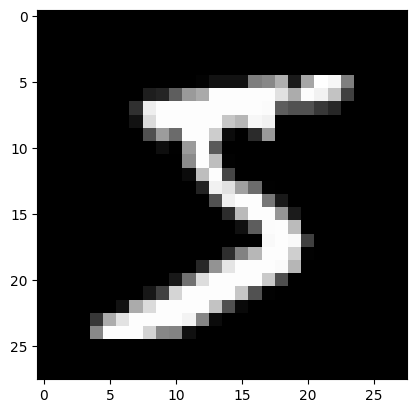

In [5]:
plt.imshow(X_train[0],cmap='gray')

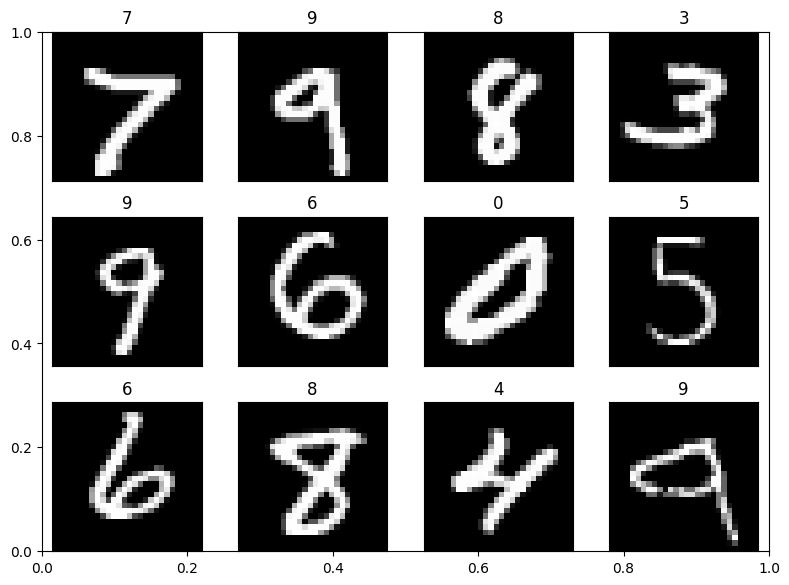

In [6]:
def plot_img(data,labels):
    num_img =12

    plt.subplots(figsize=(8,6))
    for  i in range(0,num_img):
        plt.subplot(3,4,i+1)
        plt.xticks([])
        plt.yticks([])

        rand = np.random.randint(0,len(data))
        img = data[rand]
        label = labels[rand]
        
        plt.imshow(img,cmap='gray')
        plt.title(labels[rand])

    plt.tight_layout()
    
    
    plt.show()

plot_img(X_train,y_train)

## Normalize

In [7]:
# X_train = X_train/255.0
# X_test = X_test/255.0

# X_train.shape

In [8]:
# X_train_reshape = X_train.reshape(X_train.shape[0],-1)
# X_test_reshape  =X_test.reshape(X_test.shape[0],-1)

In [9]:
# X_train_reshape.shape,X_test_reshape.shape

In [10]:
# from keras.utils import to_categorical

In [11]:
# y_train_new = to_categorical(y_train)
# y_test_new = to_categorical(y_test)

In [12]:
# y_train_new.shape,y_test_new.shape

In [13]:
# y_train_new

In [16]:
model = Sequential()

model.add(tf.keras.Input(shape =(28,28,1)))
model.add(Conv2D(filters = 16,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,426 (829.79 KB)

 Trainable params: 212,426 (829.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 10,batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9527 - loss: 0.2609 - val_accuracy: 0.9720 - val_loss: 0.0948
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9768 - loss: 0.0791 - val_accuracy: 0.9777 - val_loss: 0.0682
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9832 - loss: 0.0572 - val_accuracy: 0.9845 - val_loss: 0.0533
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9861 - loss: 0.0489 - val_accuracy: 0.9827 - val_loss: 0.0705
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9867 - loss: 0.0455 - val_accuracy: 0.9851 - val_loss: 0.0536
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9891 - loss: 0.0392 - val_accuracy: 0.9860 - val_loss: 0.0588
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9914 - loss: 0.0336 - val_accuracy: 0.9834 - val_loss: 0.0775
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9913 - loss: 0

In [23]:
import cv2


img = cv2.imread(r"D:\DAIAugust2025\Python\Anurag\OpenCV\datasets\image_dataset\images\new-char1.jpg",0)
# img  = cv2.resize(img,(28,28))
# _,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# plt.imshow(img)
# img = img.reshape(1,784)
# pred = model.predict(img).argmax(axis=1)

# plt.title(f'class:{pred[0]}')
# plt.show()

In [25]:
img = img.reshape(28,28,1)
result = model.predict(img,verbose = False)
print(np.argmax(result))

ValueError: cannot reshape array of size 1032031 into shape (28,28,1)